# PROYECTO 2. RKG (RESTART KERNEL GIRLS)
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import sys

sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

pd.options.display.max_columns = None

## VISUALIZACIÓN Y ANÁLISIS

## 1. Creación de las subtablas para facilitar la visualización

In [2]:
df = pd.read_pickle('../resultados/df_da_relevante_limpio.pkl')
df.head()

,age,gender,q3,q4,q6,q7,q8,q9,q10,q14,q20,q21,q22,q24,q34,q35,q39,q41,continente
0,50-54,Man,Belgium,Bachelor’s degree,20+ years,"[Python, SQL]",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Jupyter...","[Kaggle Notebooks, Colab Notebooks, Databricks...","[ Matplotlib , Seaborn , Plotly / Plotly Expre...",[Energy/Mining],"1000-9,999 employees",5-9,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Local development environments (RStudio-Jupyt...,Europa
1,22-24,Nonbinary,United States of America,Some college/university study without earning ...,< 1 years,[ R],R,[RStudio ],[Google Cloud Datalab],[Ggplot / ggplot2 ],[Manufacturing/Fabrication],250-999 employees,3-4,NaN,NaN,NaN,NaN,NaN,América del Norte
2,30-34,Woman,Egypt,Bachelor’s degree,3-5 years,[Python],R,"[ Notepad++, Jupyter Notebook]","[Kaggle Notebooks, Colab Notebooks]",[ None],[Non-profit/Service],0-49 employees,0,[Analyze and understand data to influence prod...,[ None],NaN,[I do not share my work publicly],[Basic statistical software (Microsoft Excel-G...,África
3,22-24,Man,China,Some college/university study without earning ...,< 1 years,"[Python, SQL, C, C++, Java, Javascript, ...",Python,"[Jupyter-JupyterLab-JupyterNotebooks , Visual ...","[Kaggle Notebooks, Azure Notebooks]","[ Matplotlib , Plotly / Plotly Express ]",[Computers/Technology],0-49 employees,0,[Analyze and understand data to influence prod...,NaN,NaN,NaN,[Basic statistical software (Microsoft Excel-G...,Asia
4,40-44,Man,South Africa,Master’s degree,1-3 years,"[ R, SQL]",R,"[RStudio , Jupyter Notebook]",[IBM Watson Studio],"[Plotly / Plotly Express , Ggplot / ggplot2 , ...",[Manufacturing/Fabrication],250-999 employees,1-2,[Analyze and understand data to influence prod...,[ Microsoft Power BI],NaN,[I do not share my work publicly],[Local development environments (RStudio-Jupyt...,África


In [3]:
df_q7 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q7', 'q8', 'q21', 'q22', 'q35']]
df_q9 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q9', 'q21', 'q22', 'q35']]
df_q10 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q10', 'q21', 'q22', 'q35']]
df_q14 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q14', 'q21', 'q22', 'q35']]
df_q20 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q20', 'q21', 'q22', 'q35']]
df_q24 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q21', 'q22', 'q24', 'q35']]
df_q34 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q21', 'q22', 'q34', 'q35']]
df_q39 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q21', 'q22', 'q35', 'q39']]
df_q41 = df[['age', 'gender', 'q3', 'continente', 'q4', 'q6', 'q8', 'q21', 'q22', 'q35', 'q41']]

In [4]:
df_q7 = df_q7.explode('q7')
df_q9 = df_q9.explode('q9')
df_q10 = df_q10.explode('q10')
df_q14 = df_q14.explode('q14')
df_q20 = df_q20.explode('q20')
df_q24 = df_q24.explode('q24')
df_q34 = df_q34.explode('q34')
df_q39 = df_q39.explode('q39')
df_q41 = df_q41.explode('q41')

In [5]:
df_q7.sample(3)

,age,gender,q3,continente,q4,q6,q7,q8,q21,q22,q35
609,22-24,Woman,India,Asia,Bachelor’s degree,< 1 years,Other,Python,50-249 employees,3-4,NaN
1010,25-29,Man,Mexico,América del Sur,Bachelor’s degree,1-3 years,SQL,SQL,0-49 employees,1-2,NaN
1561,55-59,Man,Argentina,América del Sur,Master’s degree,20+ years,C,Python,50-249 employees,1-2,NaN


### Características del Data Analyst

- Tareas a las que más tiempo dedica un Analista de Datos

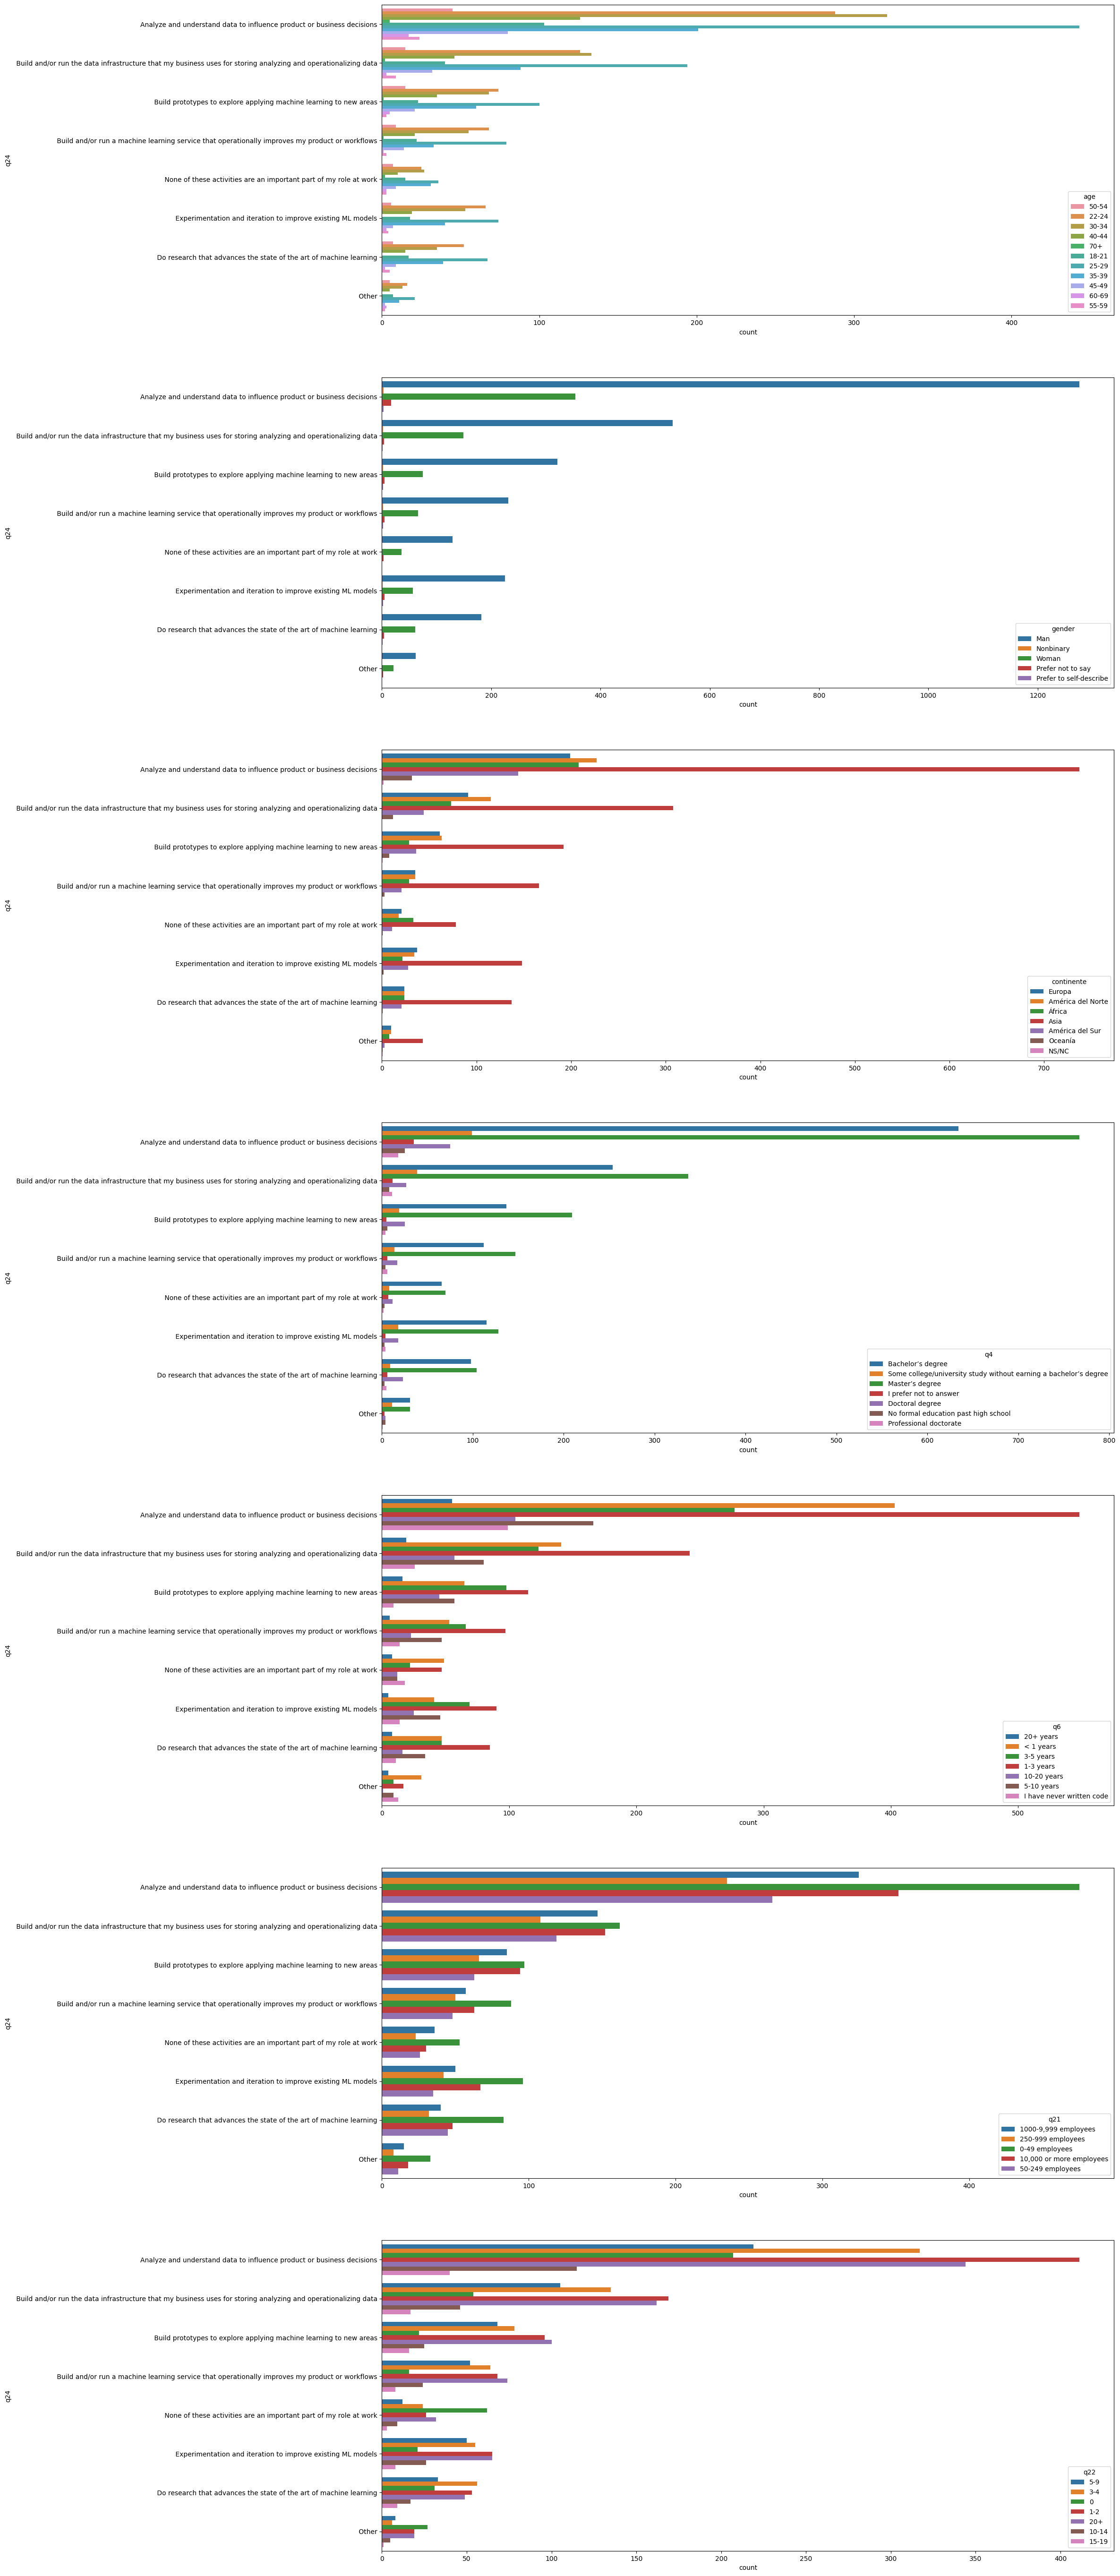

In [6]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,70))
contador = 0
for i in spv.lista_hues:
    sns.countplot(y = 'q24', data=df_q24, ax=axes[contador], hue=i)
    contador += 1
plt.show(); 


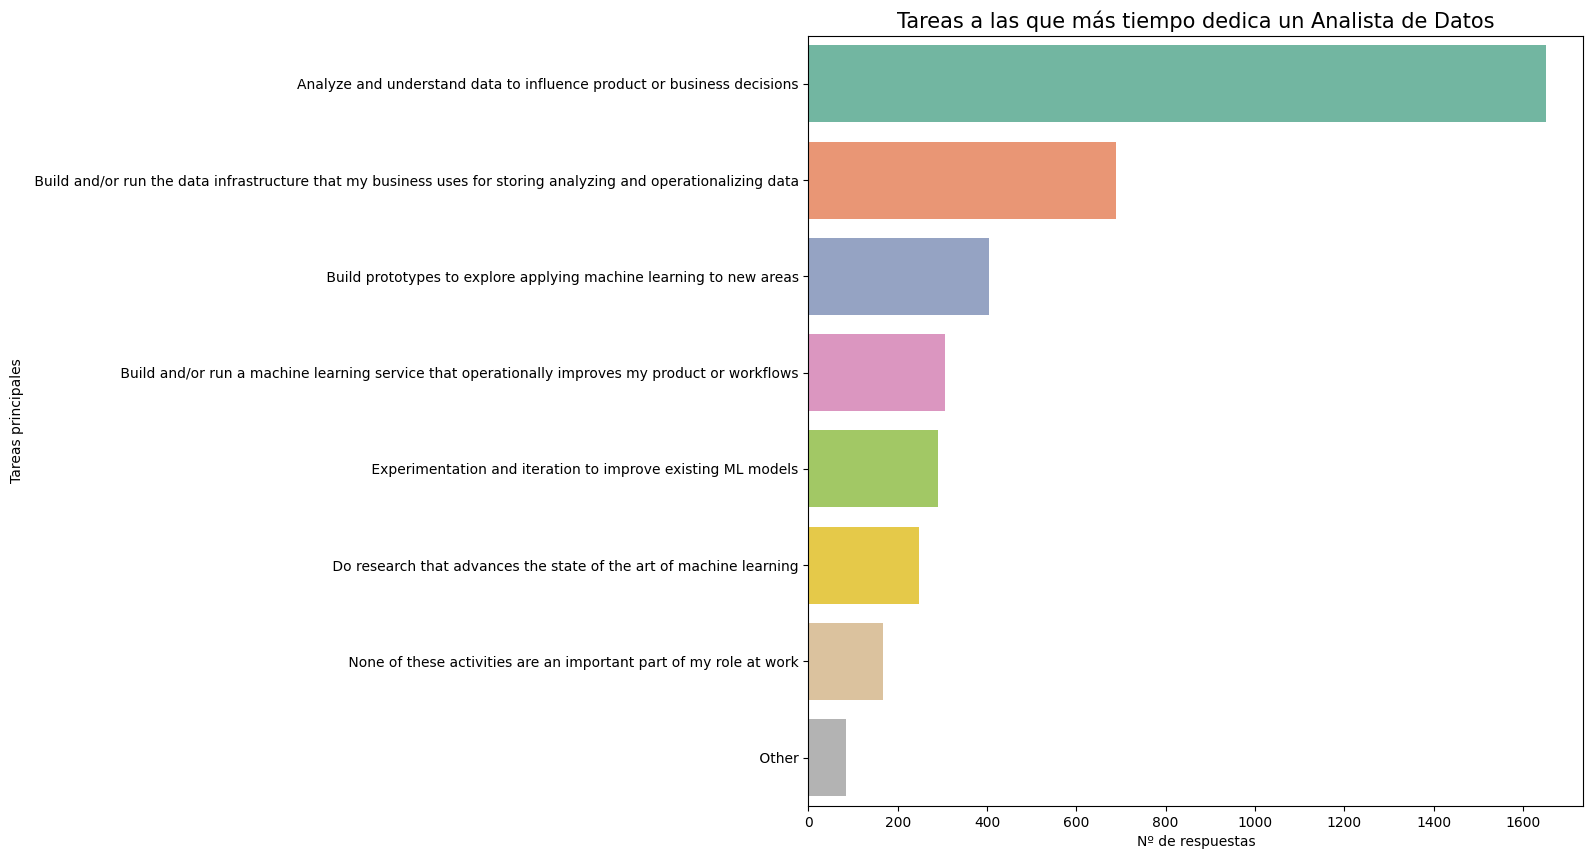

In [7]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q24', data = df_q24, palette = 'Set2', order=df_q24['q24'].value_counts().reset_index()['index'])

fig.set_title('Tareas a las que más tiempo dedica un Analista de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Tareas principales') 

plt.show();

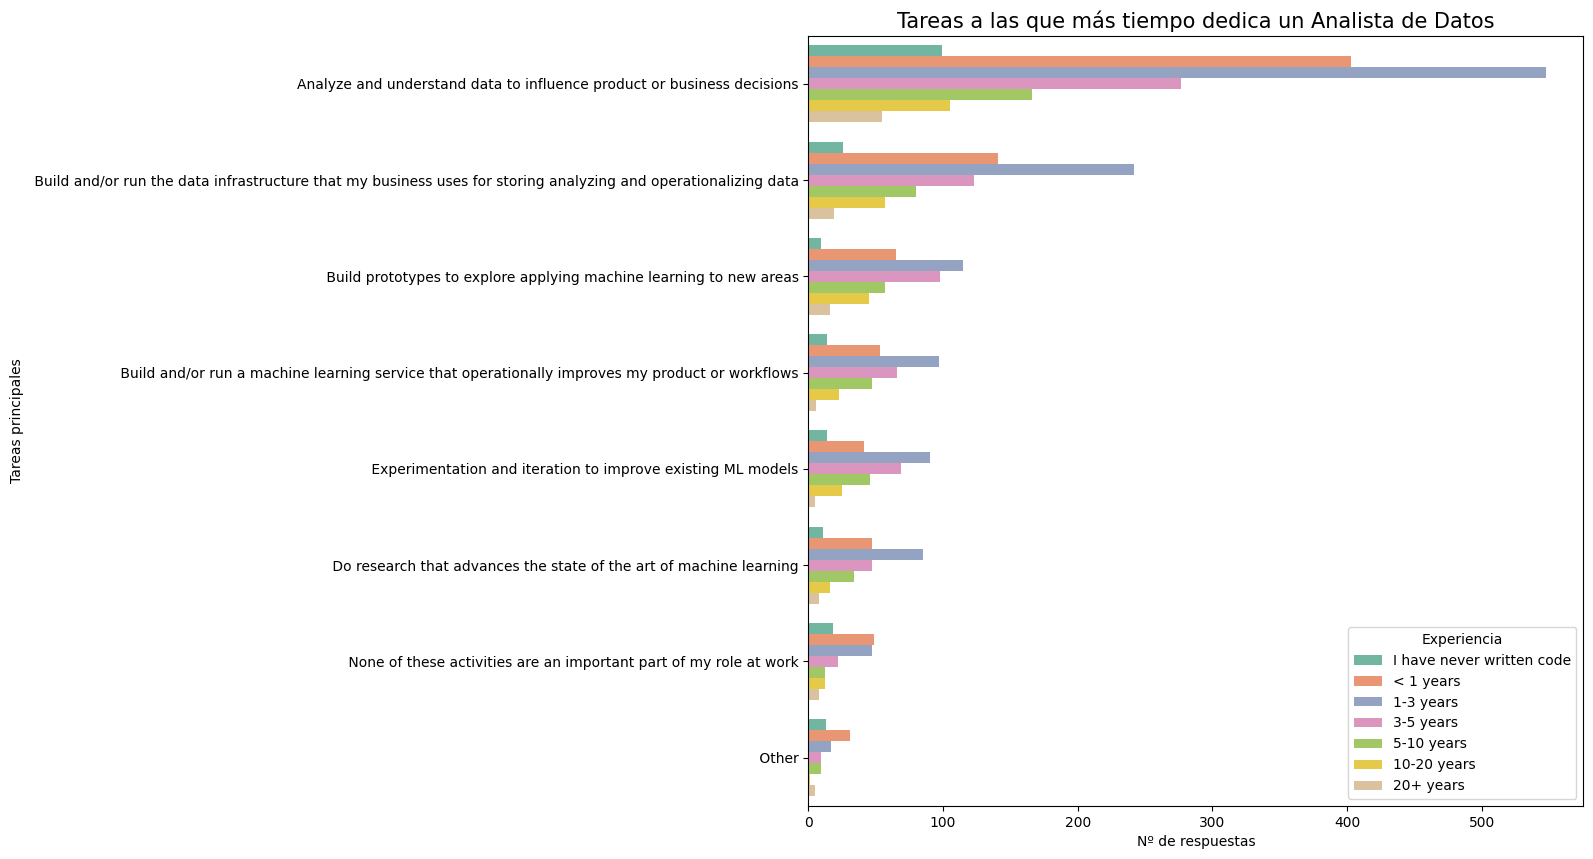

In [56]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q24', data = df_q24, palette = 'Set2', hue= 'q6', order=df_q24['q24'].value_counts().reset_index()['index'], 
                    hue_order=spv.orden_experiencia)

fig.set_title('Tareas a las que más tiempo dedica un Analista de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Tareas principales') 

plt.legend(title='Experiencia')

plt.show();

- Distribución por edades

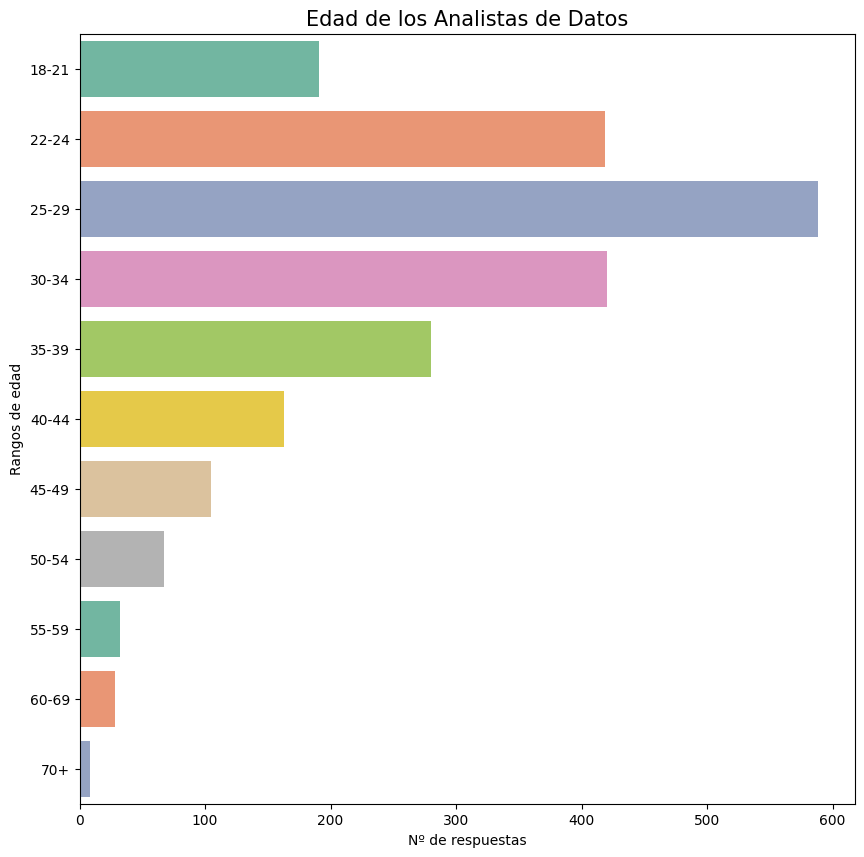

In [9]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'age', data = df, palette = 'Set2', order=spv.orden_edades)

fig.set_title('Edad de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Rangos de edad') 

plt.show();

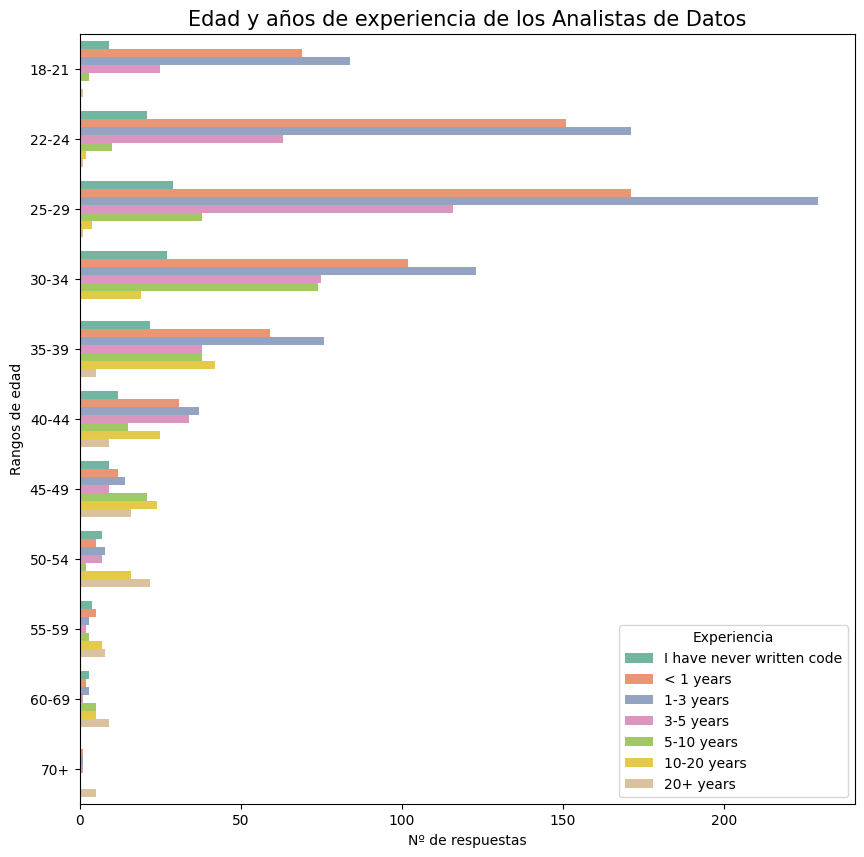

In [57]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'age', data = df, palette = 'Set2', hue= 'q6', order=spv.orden_edades, hue_order=spv.orden_experiencia)

fig.set_title('Edad y años de experiencia de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Rangos de edad') 

plt.legend(title='Experiencia')

plt.show();

- Experiencia como Data Analist

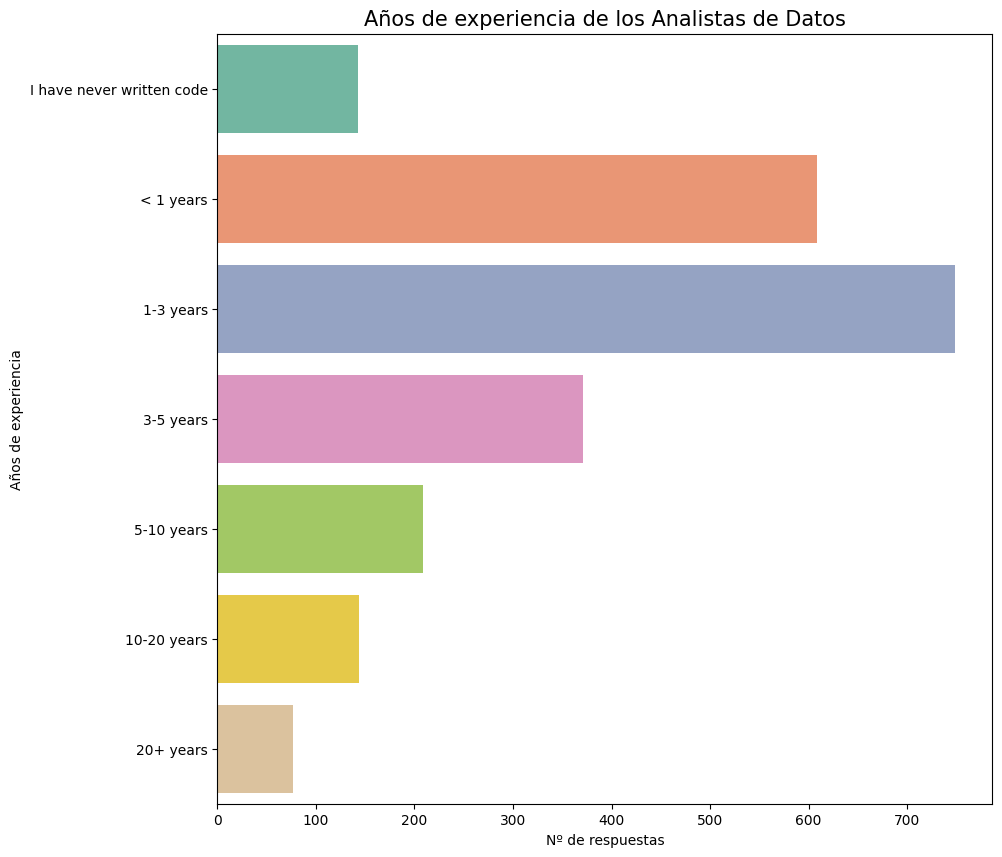

In [11]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', order=spv.orden_experiencia)

fig.set_title('Años de experiencia de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia') 

plt.show();

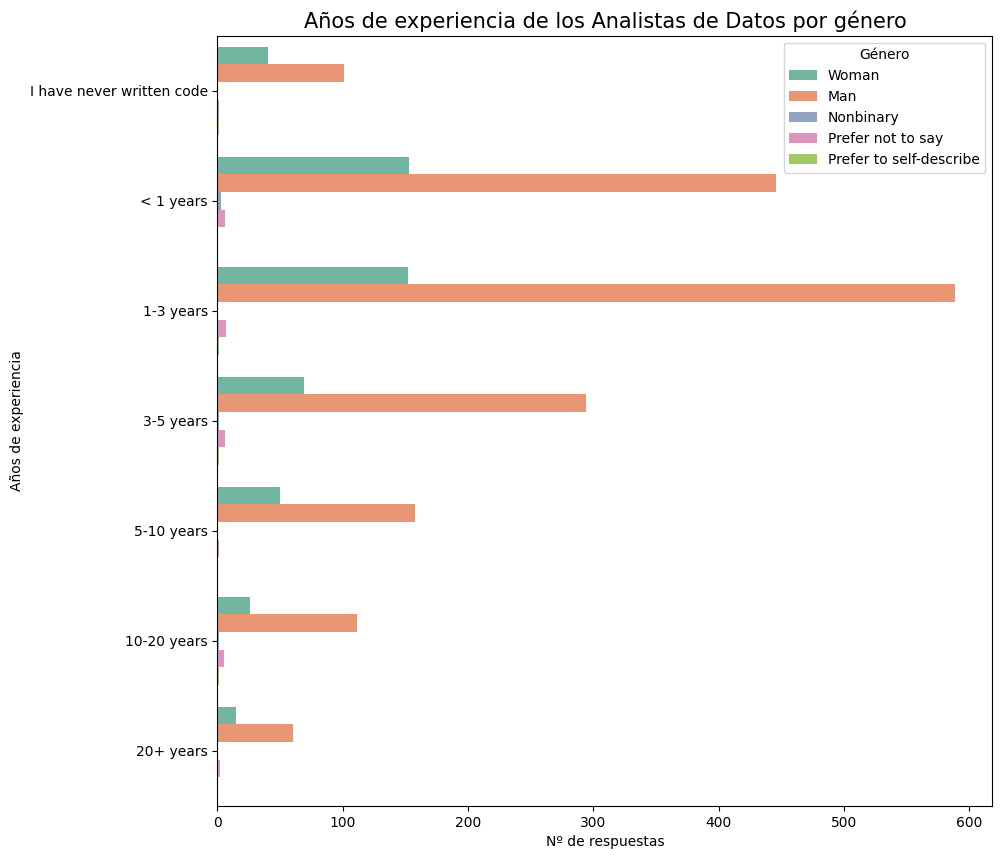

In [58]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', hue = 'gender', order=spv.orden_experiencia, hue_order=spv.orden_genero)

fig.set_title('Años de experiencia de los Analistas de Datos por género', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia') 

plt.legend(title='Género')

plt.show();

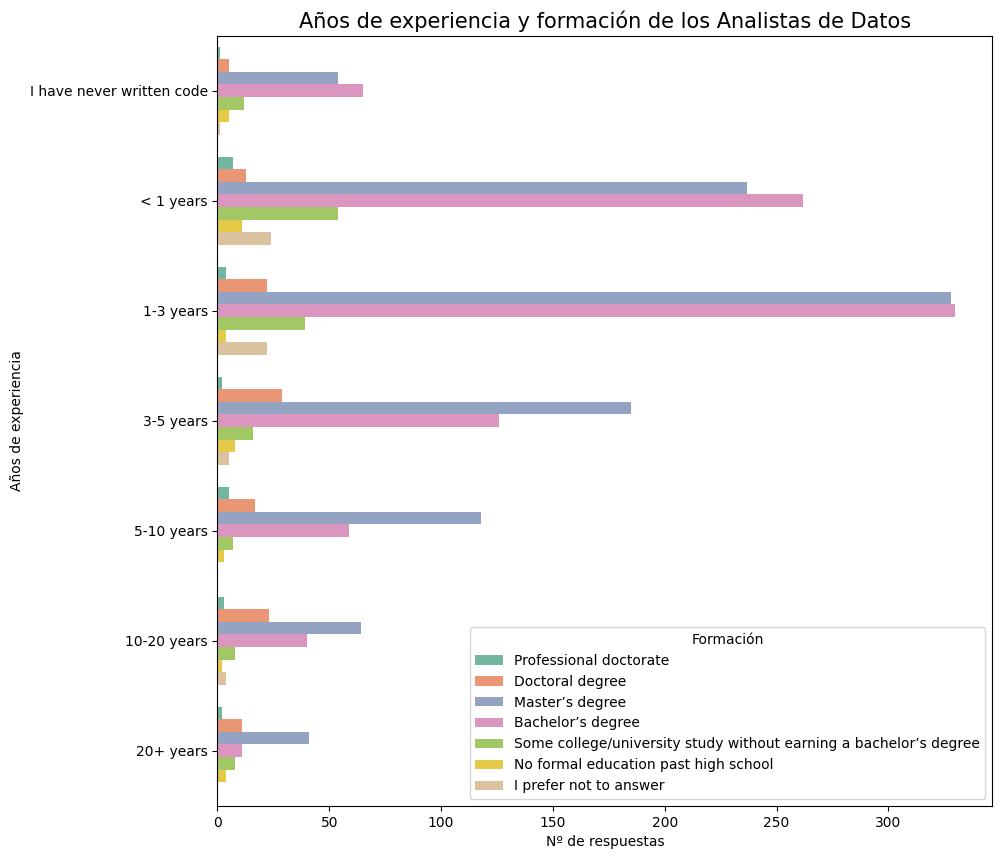

In [61]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q6', data = df, palette = 'Set2', hue = 'q4', order=spv.orden_experiencia, hue_order=spv.orden_formacion)

fig.set_title('Años de experiencia y formación de los Analistas de Datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Años de experiencia') 

plt.legend(title='Formación')

plt.show();

- Paises / continentes

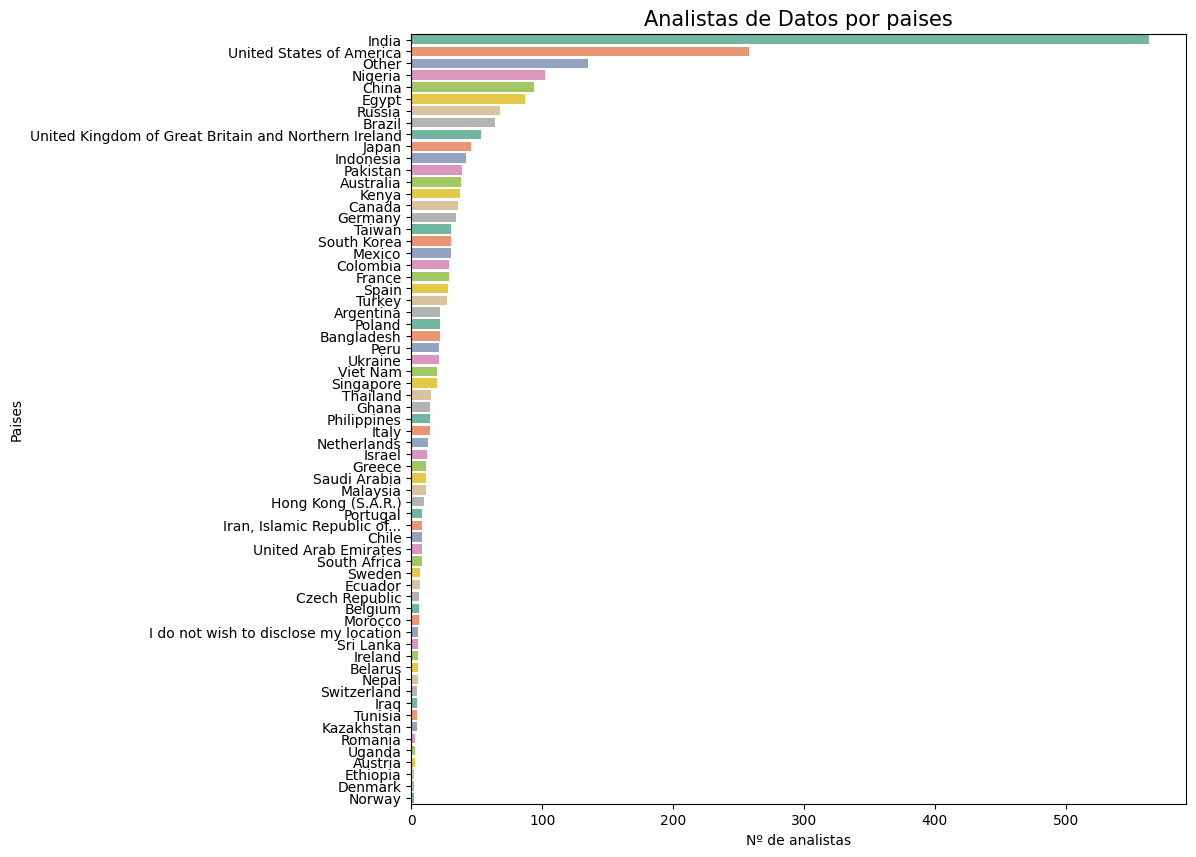

In [14]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q3', data = df,  palette = 'Set2', order = df['q3'].value_counts().reset_index()['index'])

fig.set_title('Analistas de Datos por paises', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Paises') 

plt.show();

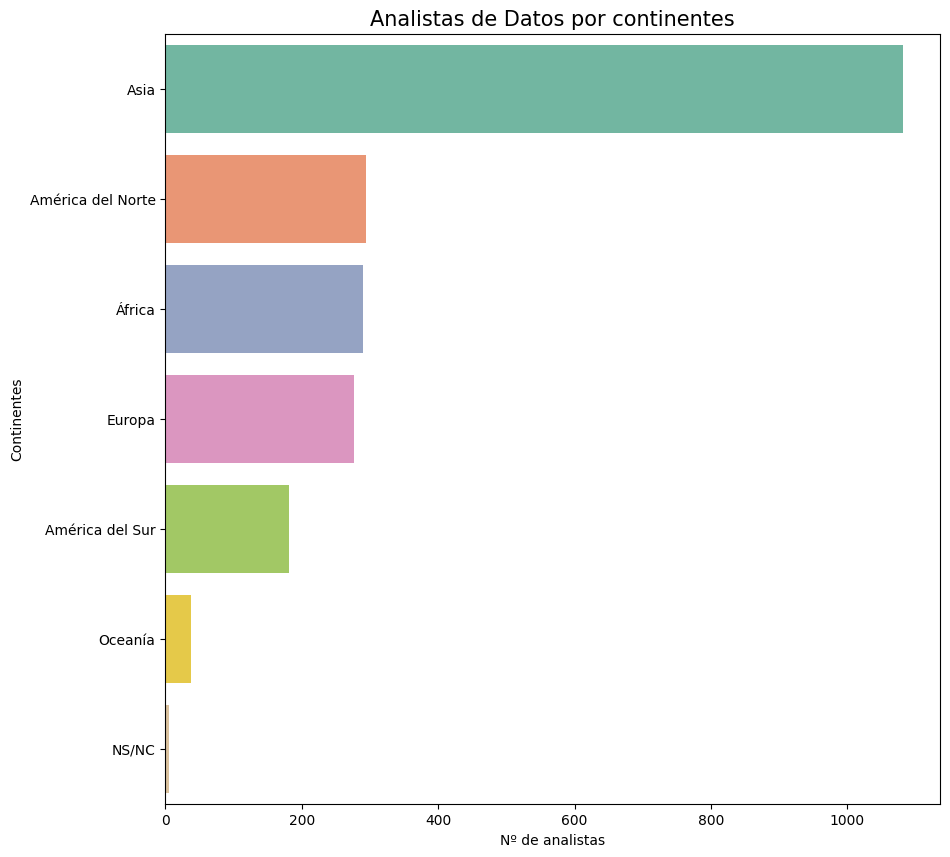

In [15]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='continente', data = df,  palette = 'Set2', order = df['continente'].value_counts().reset_index()['index'])

fig.set_title('Analistas de Datos por continentes', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Continentes') 

plt.show();

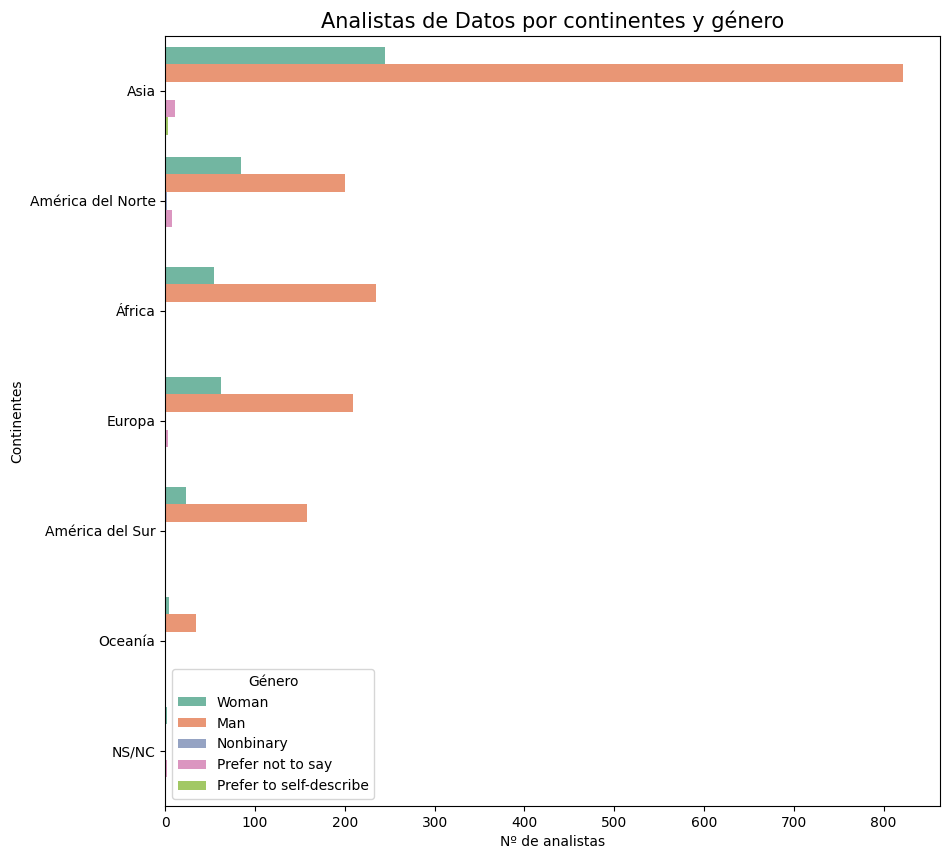

In [62]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='continente', data = df,  palette = 'Set2', hue = 'gender', order = df['continente'].value_counts().reset_index()['index'], hue_order = spv.orden_genero)

fig.set_title('Analistas de Datos por continentes y género', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Continentes') 

plt.legend(title='Género')

plt.show();

- Sectores

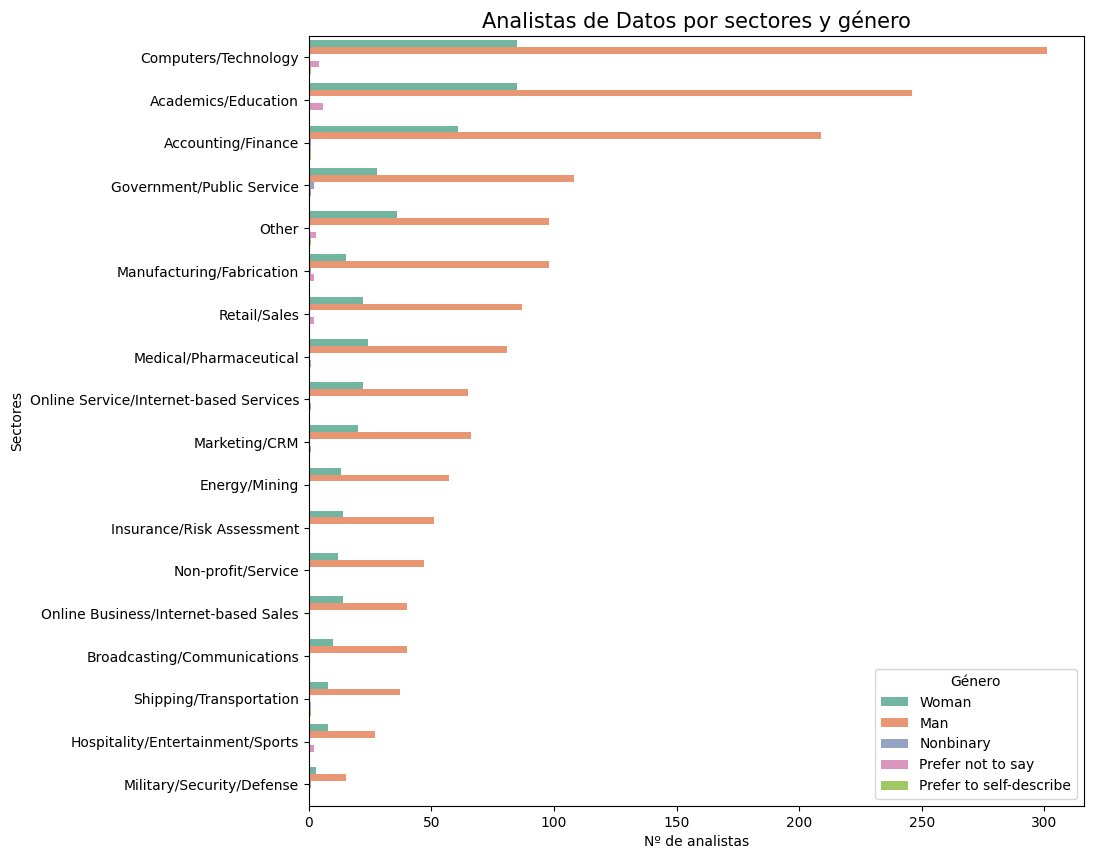

In [63]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q20', data = df_q20,  palette = 'Set2', hue = 'gender', order = df_q20['q20'].value_counts().reset_index()['index'], hue_order = spv.orden_genero)

fig.set_title('Analistas de Datos por sectores y género', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Sectores') 

plt.legend(title='Género')

plt.show();

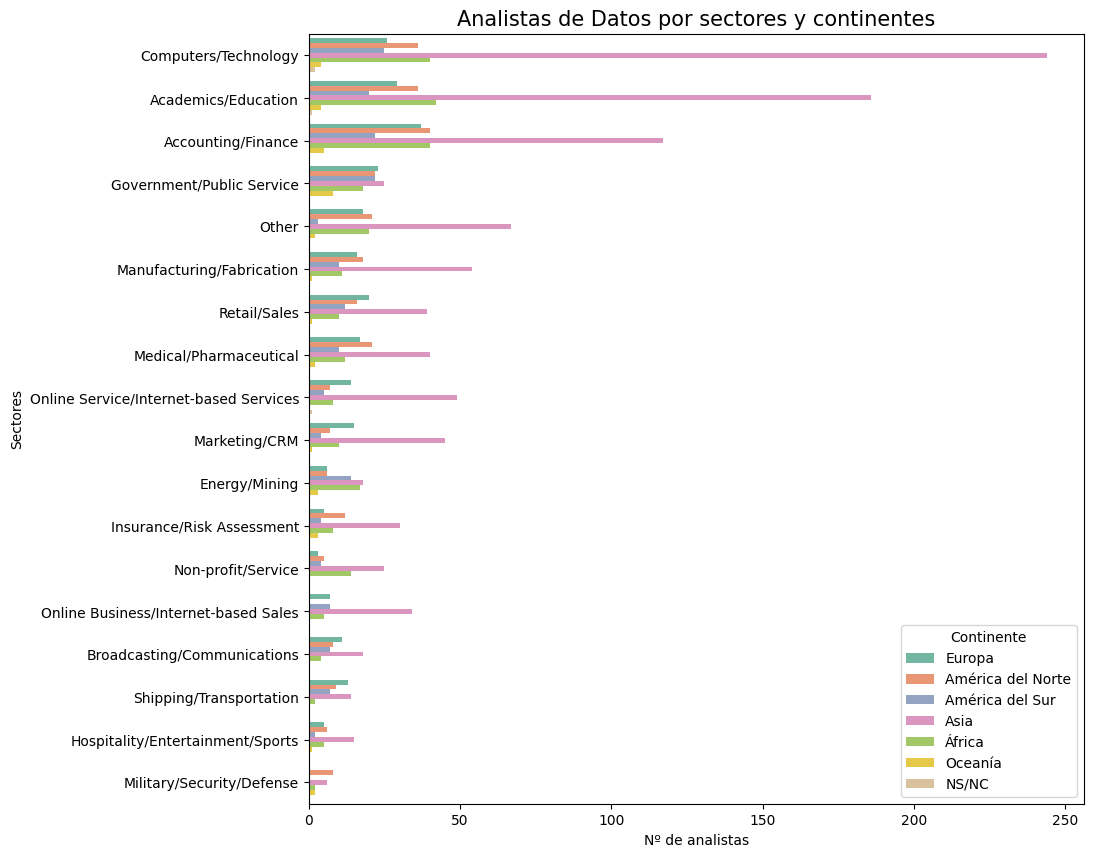

In [64]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q20', data = df_q20,  palette = 'Set2', hue = 'continente', order = df_q20['q20'].value_counts().reset_index()['index'], hue_order = spv.orden_continentes)

fig.set_title('Analistas de Datos por sectores y continentes', fontsize = 15)

fig.set(xlabel='Nº de analistas', ylabel='Sectores') 

plt.legend(title='Continente')

plt.show();

### Herramientas

- Lenguajes de programación

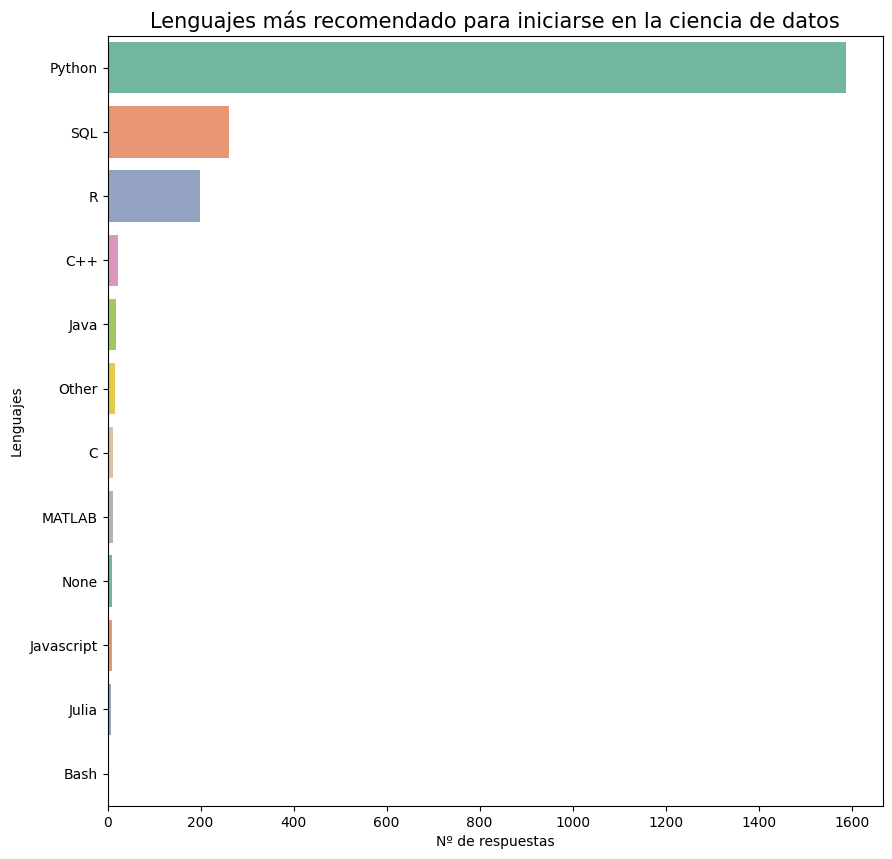

In [19]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q8', data = df, palette = 'Set2', order=df['q8'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes más recomendado para iniciarse en la ciencia de datos', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.show();

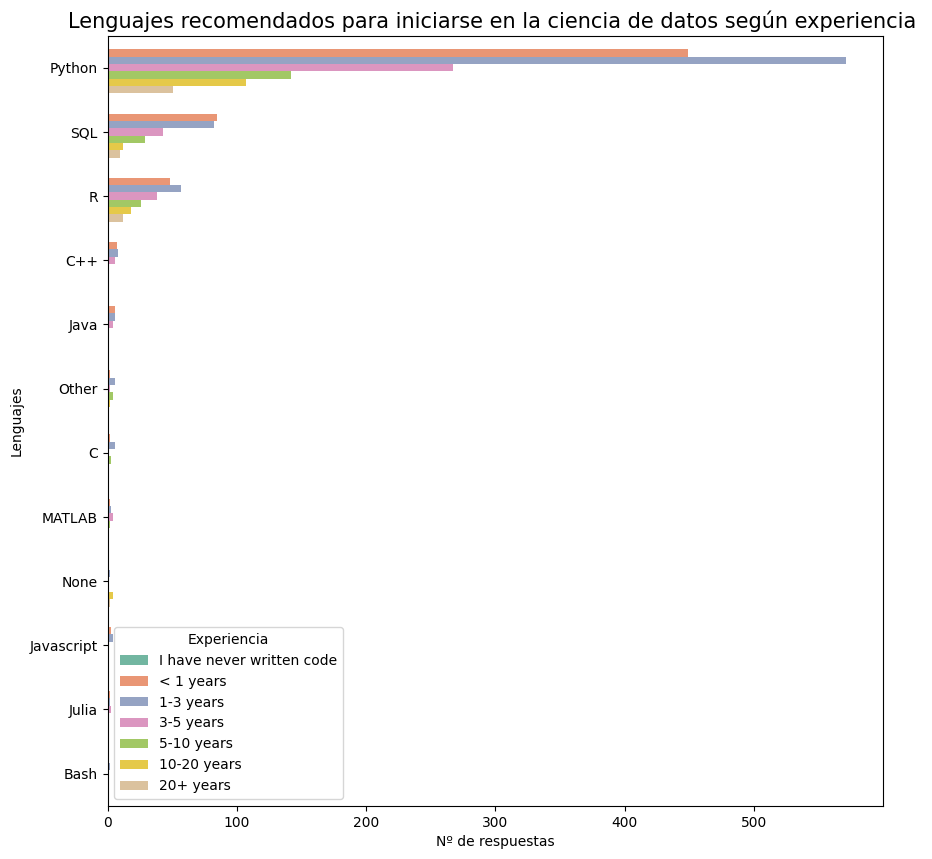

In [65]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q8', data = df, palette = 'Set2', hue = 'q6', order=df['q8'].value_counts().reset_index()['index'], hue_order = spv.orden_experiencia)

fig.set_title('Lenguajes recomendados para iniciarse en la ciencia de datos según experiencia ', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.legend(title='Experiencia')

plt.show();

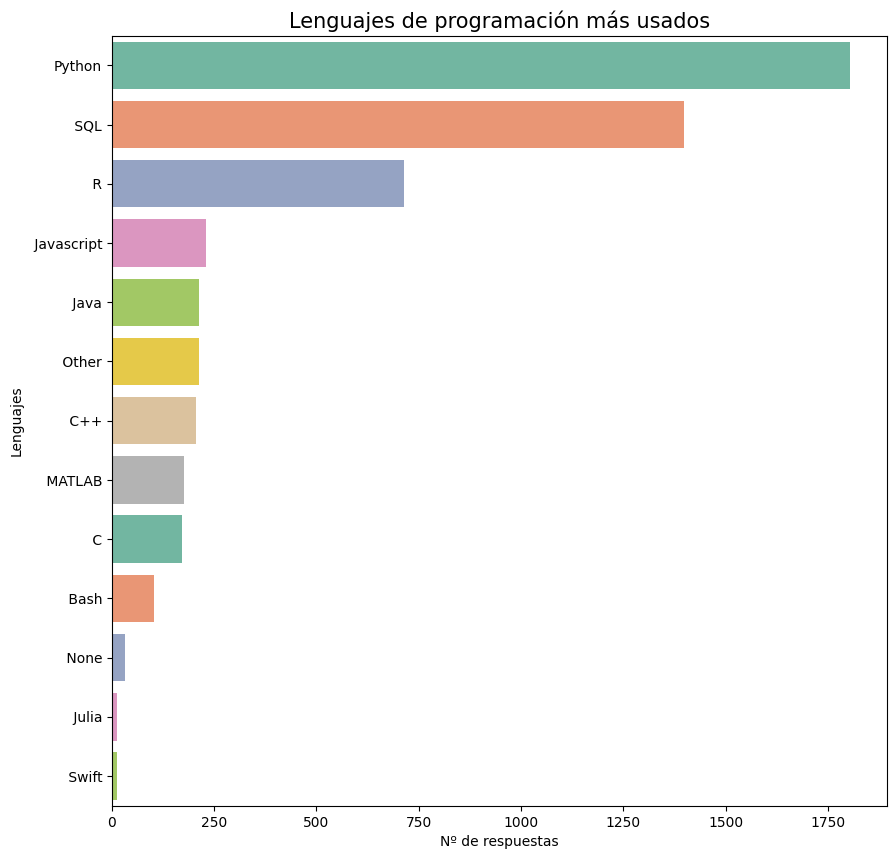

In [21]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q7', data = df_q7, palette = 'Set2', order=df_q7['q7'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes de programación más usados', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.show();

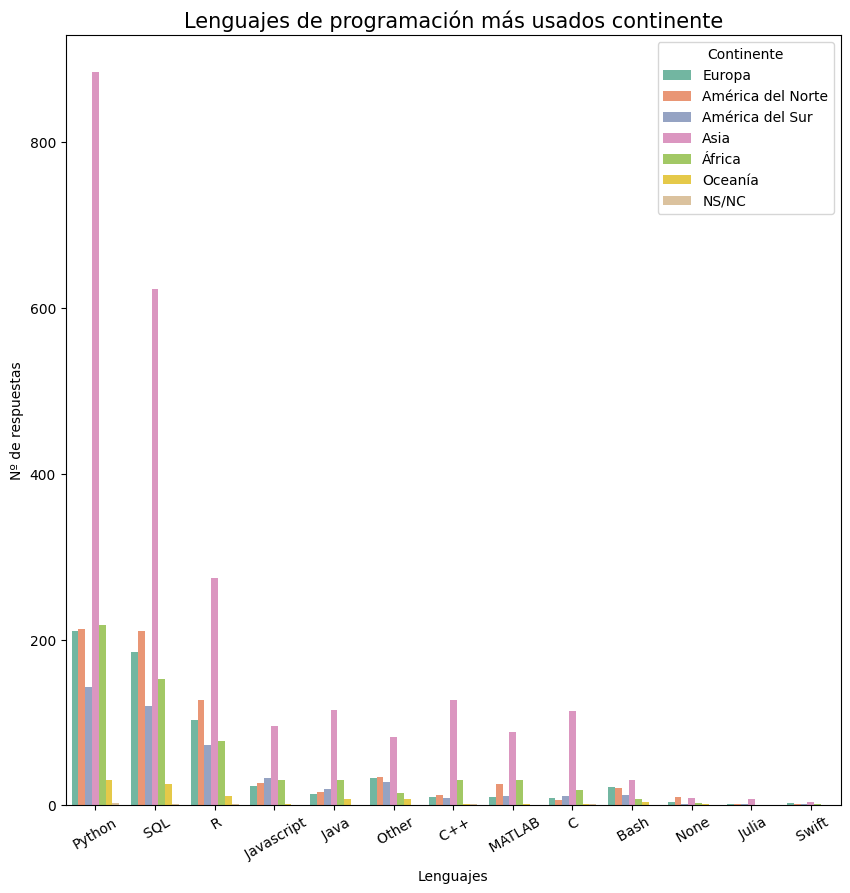

In [67]:
plt.figure(figsize = (10,10))

fig=sns.countplot(x = 'q7', hue = 'continente', data = df_q7, palette = 'Set2', 
                    order=df_q7['q7'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)
              
fig.set_title('Lenguajes de programación más usados continente', fontsize = 15)

fig.set(ylabel='Nº de respuestas', xlabel='Lenguajes') 

plt.xticks(rotation=30)

plt.legend(title='Continente')

plt.show();

- Librerías de visualización

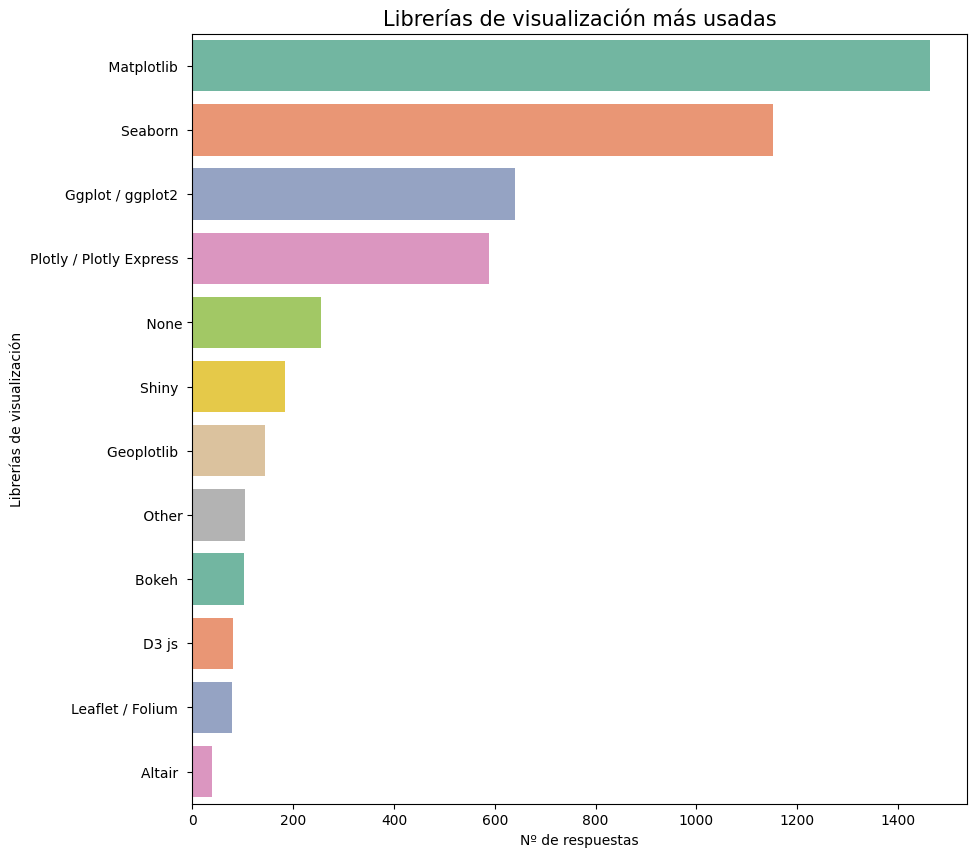

In [23]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q14', data = df_q14, palette = 'Set2', order=df_q14['q14'].value_counts().reset_index()['index'])

fig.set_title('Librerías de visualización más usadas', fontsize = 15)

fig.set(ylabel='Librerías de visualización', xlabel='Nº de respuestas') 

plt.show();

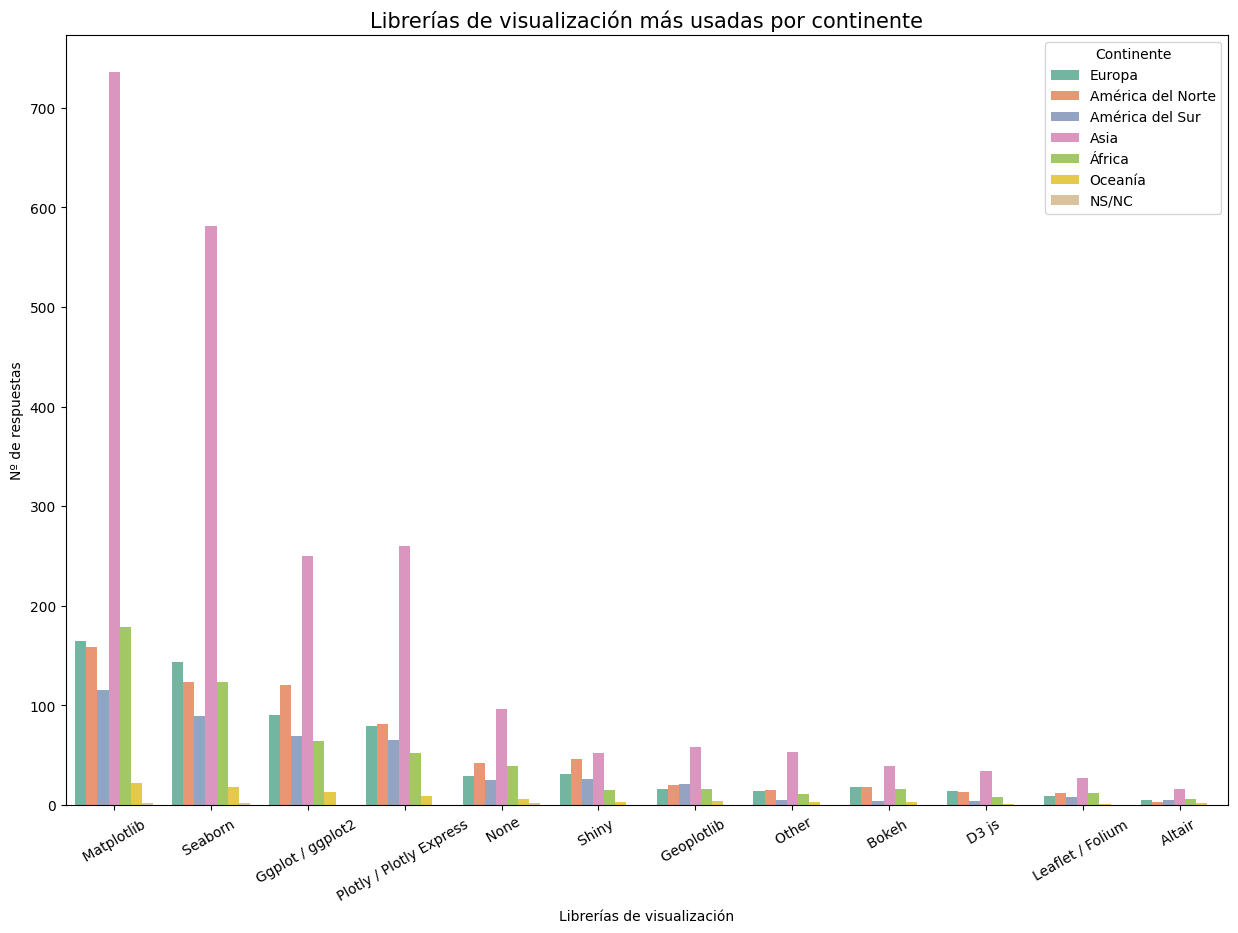

In [68]:
plt.figure(figsize = (15,10))

fig = sns.countplot(x = 'q14', data = df_q14, palette = 'Set2', hue='continente', order=df_q14['q14'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Librerías de visualización más usadas por continente', fontsize = 15)

fig.set(ylabel='Nº de respuestas', xlabel='Librerías de visualización') 

plt.xticks(rotation=30)

plt.legend(title='Continente')

plt.show();

- Plataformas para compartir públicamente su trabajo

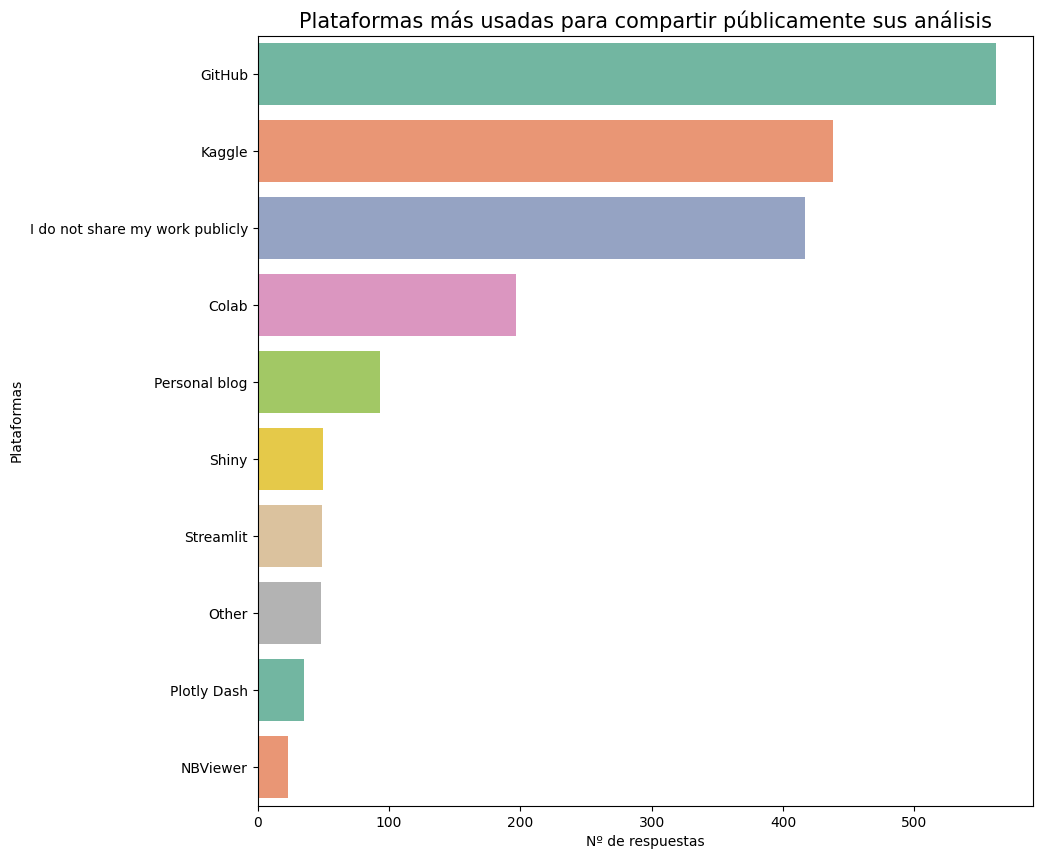

In [25]:
plt.figure(figsize = (10,10))

fig=sns.countplot(y = 'q39', data = df_q39, palette = 'Set2', order=df_q39['q39'].value_counts().reset_index()['index'])

fig.set_title('Plataformas más usadas para compartir públicamente sus análisis', fontsize = 15)

fig.set(ylabel='Plataformas', xlabel='Nº de respuestas') 

plt.show();

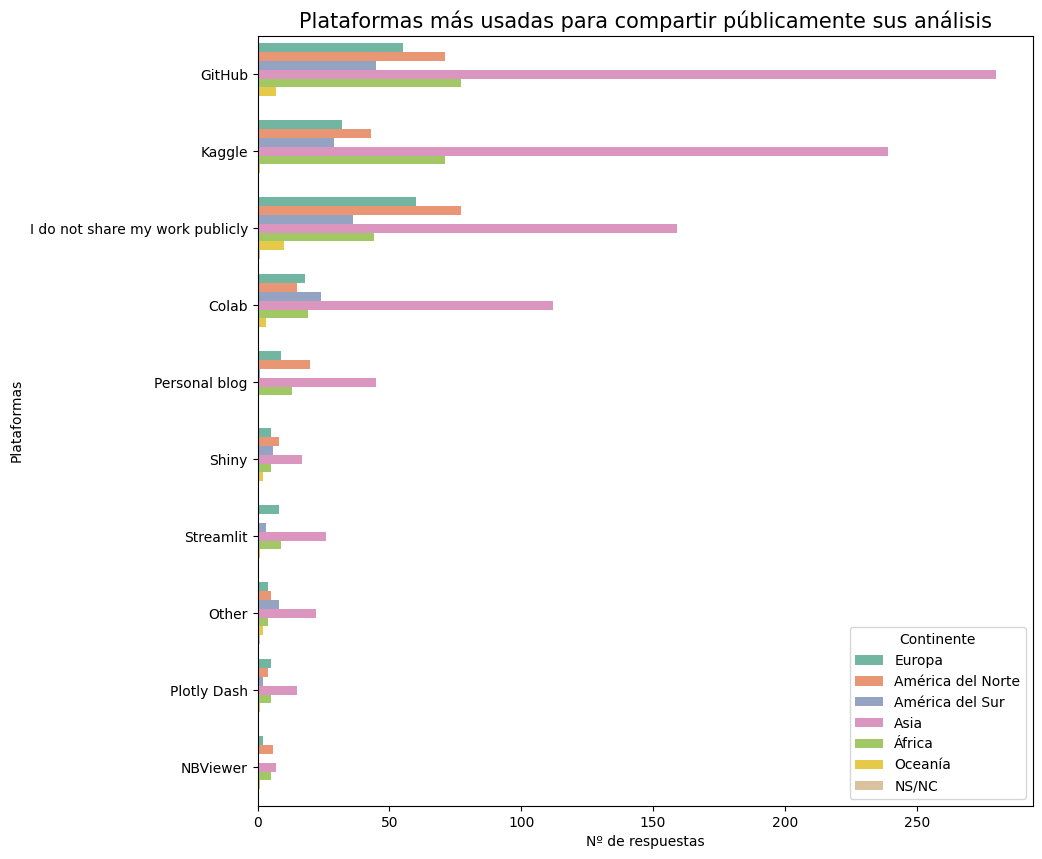

In [69]:
plt.figure(figsize = (10,10))

fig=sns.countplot(y = 'q39', hue= 'continente', data = df_q39, palette = 'Set2', order=df_q39['q39'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Plataformas más usadas para compartir públicamente sus análisis', fontsize = 15)

fig.set(ylabel='Plataformas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

- Principal herramienta de análisis de datos

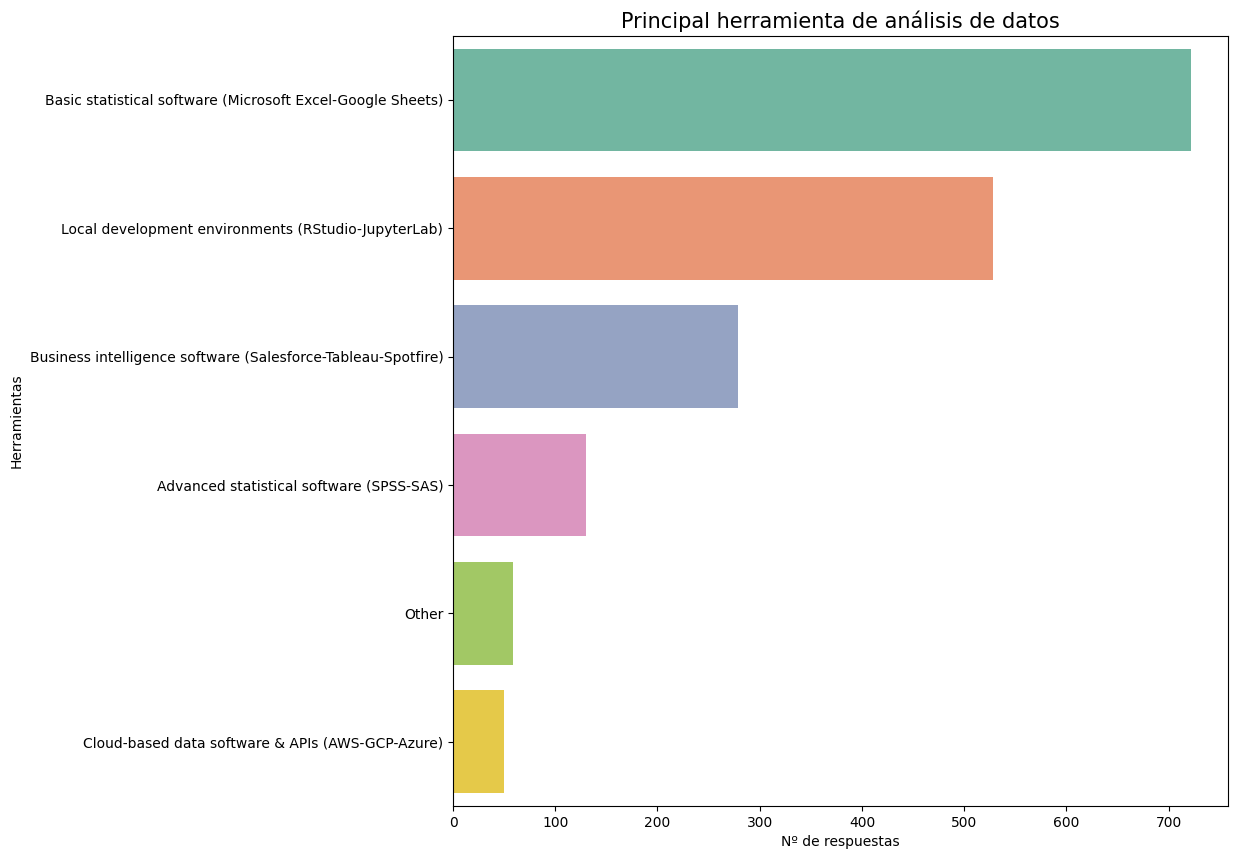

In [27]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q41', data = df_q41, palette = 'Set2', order=df_q41['q41'].value_counts().reset_index()['index'])

fig.set_title('Principal herramienta de análisis de datos', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

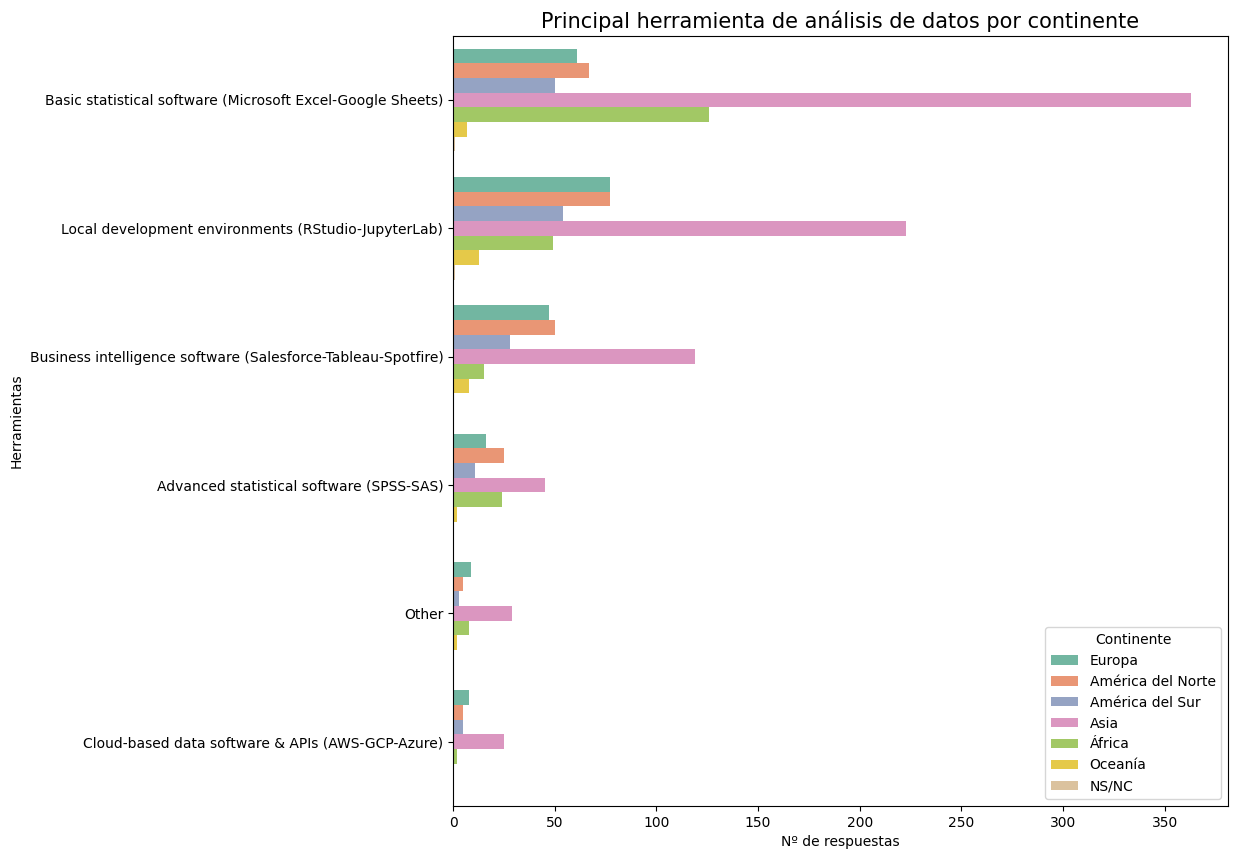

In [70]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q41', data = df_q41, hue = 'continente', palette = 'Set2', order=df_q41['q41'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Principal herramienta de análisis de datos por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

- Entorno de desarrollo integrado (IDE)

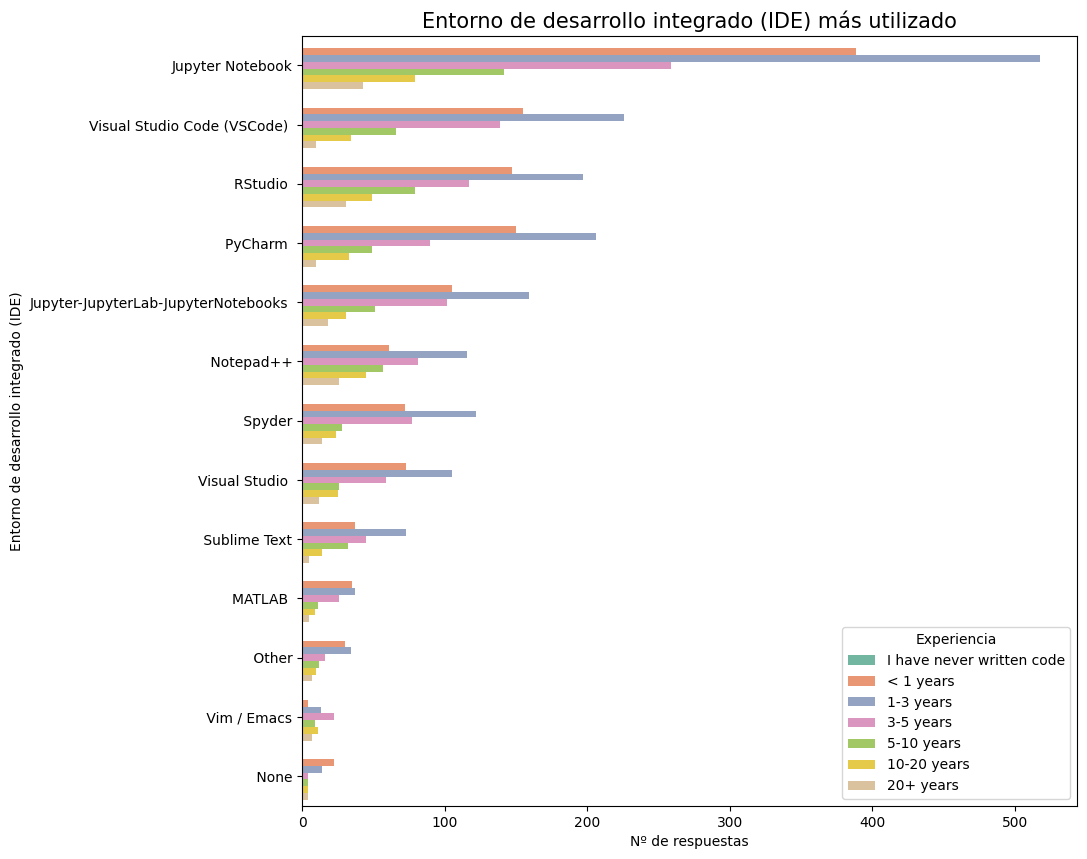

In [71]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q9', data = df_q9, hue= 'q6', palette = 'Set2', order=df_q9['q9'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Entorno de desarrollo integrado (IDE) más utilizado', fontsize = 15)

fig.set(ylabel='Entorno de desarrollo integrado (IDE)', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

- Notebooks

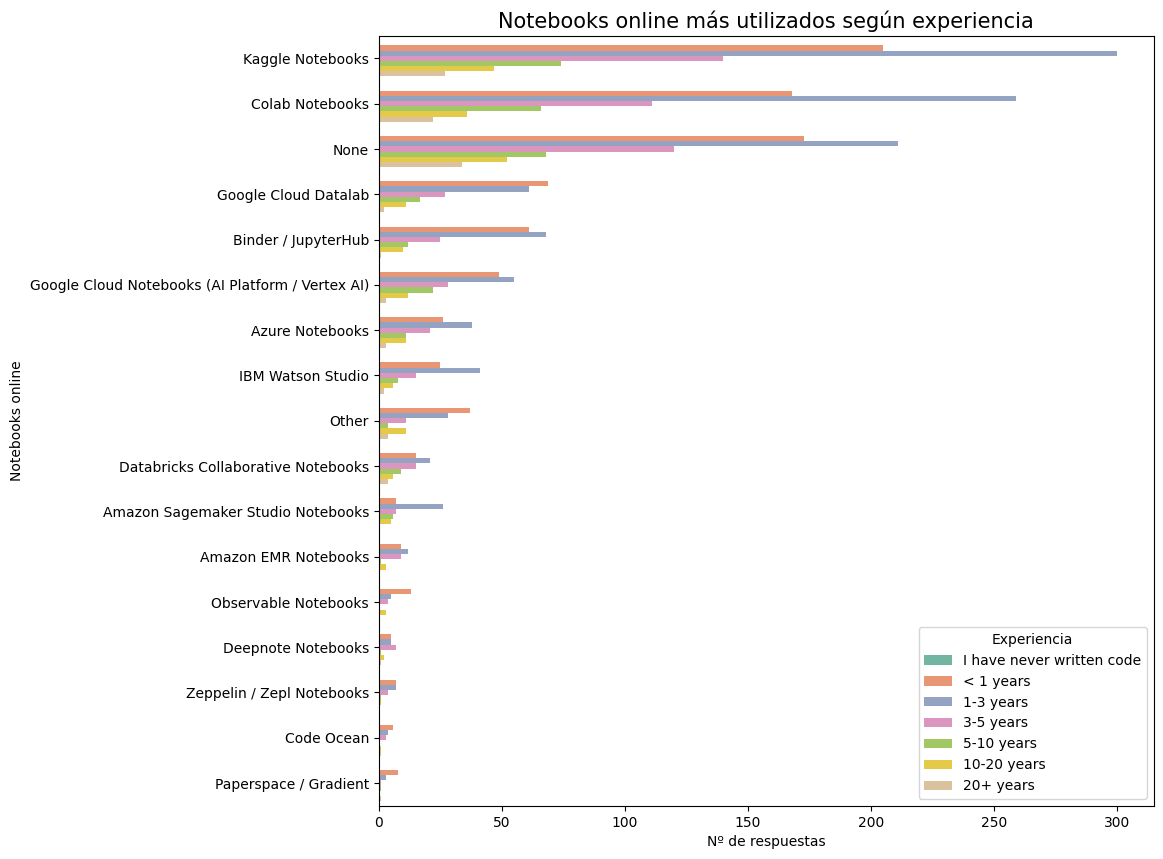

In [72]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q10', data = df_q10, hue= 'q6', palette = 'Set2', order=df_q10['q10'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Notebooks online más utilizados según experiencia', fontsize = 15)

fig.set(ylabel='Notebooks online', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

- Herramientas de business intelligence

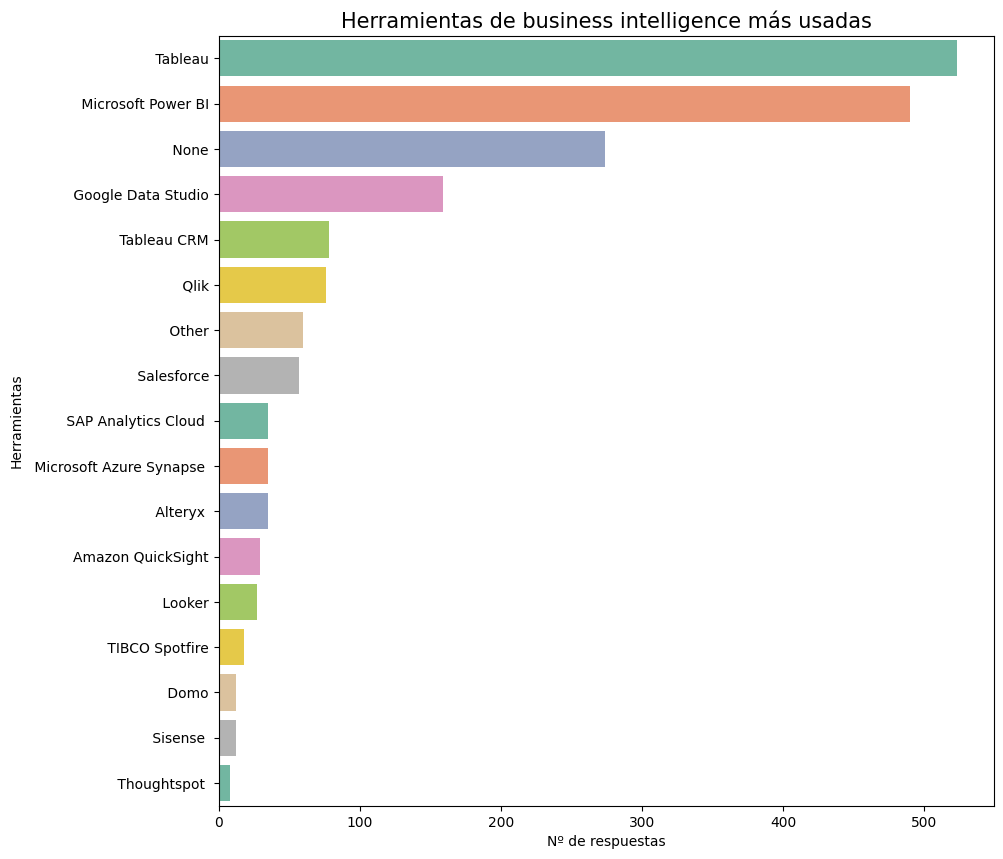

In [41]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', order=df_q34['q34'].value_counts().reset_index()['index'])

fig.set_title('Herramientas de business intelligence más usadas', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

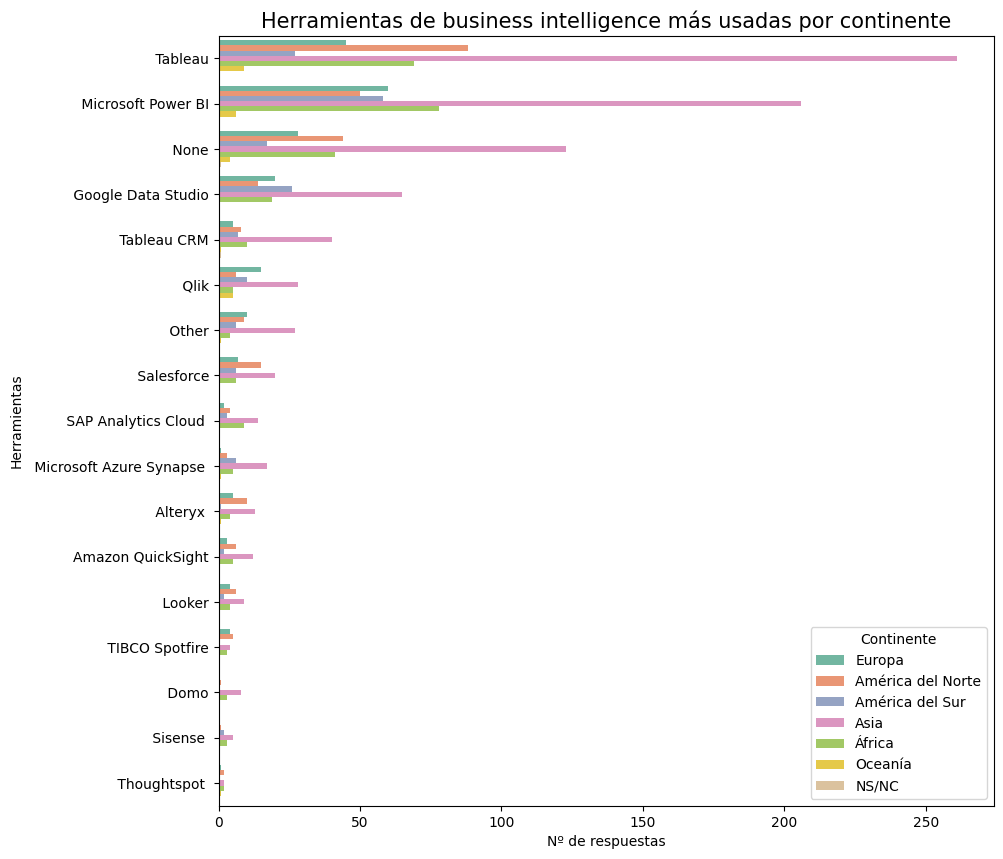

In [73]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', hue= 'continente', order=df_q34['q34'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Herramientas de business intelligence más usadas por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

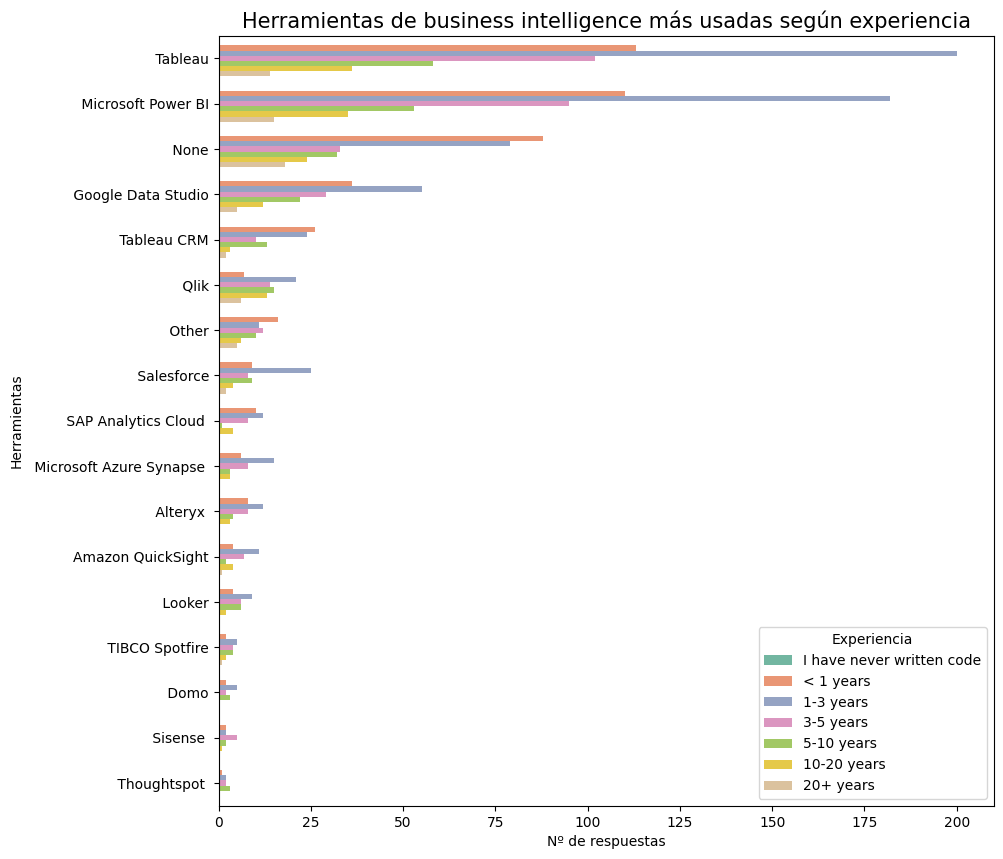

In [74]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q34', data = df_q34, palette = 'Set2', hue= 'q6', order=df_q34['q34'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Herramientas de business intelligence más usadas según experiencia', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

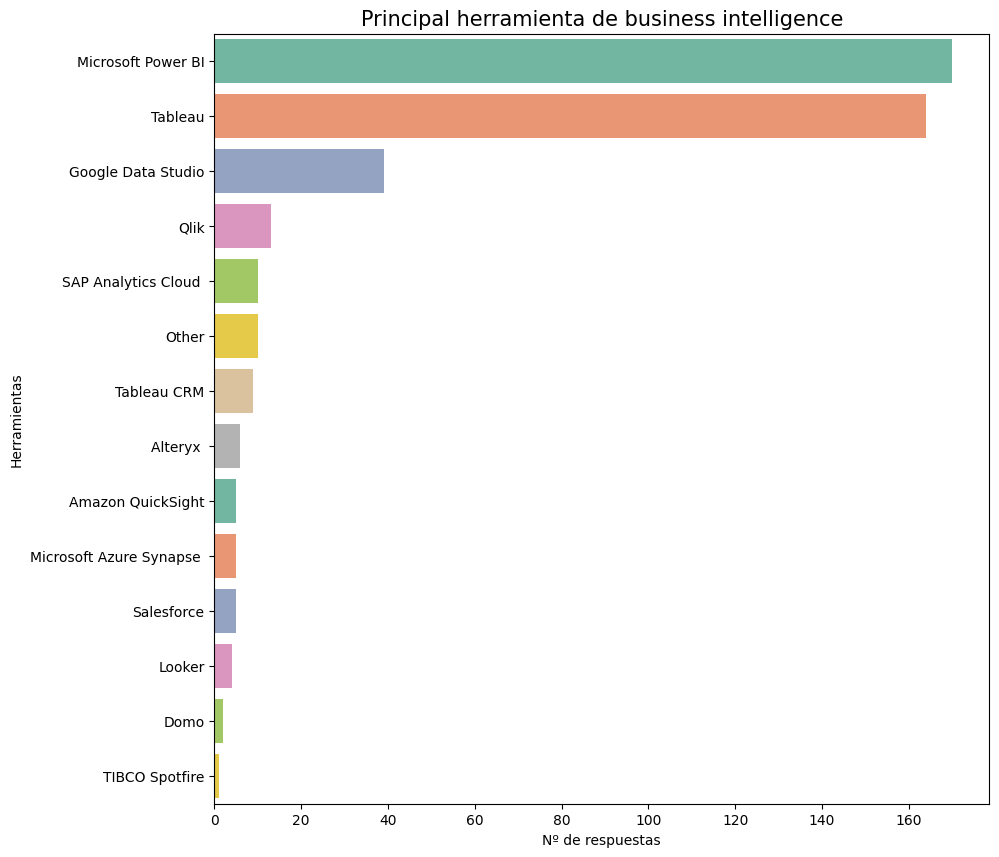

In [38]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df, palette = 'Set2', order=df['q35'].value_counts().reset_index()['index'])

fig.set_title('Principal herramienta de business intelligence', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.show();

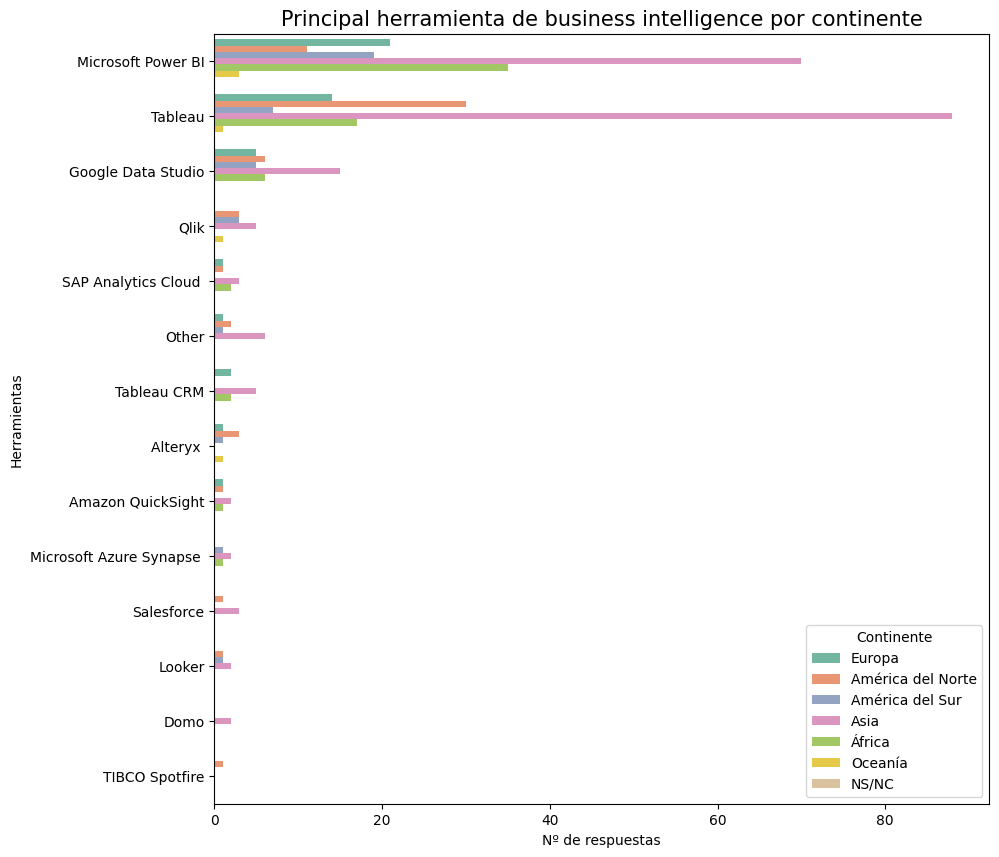

In [75]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df, palette = 'Set2', hue='continente', order=df['q35'].value_counts().reset_index()['index'], hue_order=spv.orden_continentes)

fig.set_title('Principal herramienta de business intelligence por continente', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Continente')

plt.show();

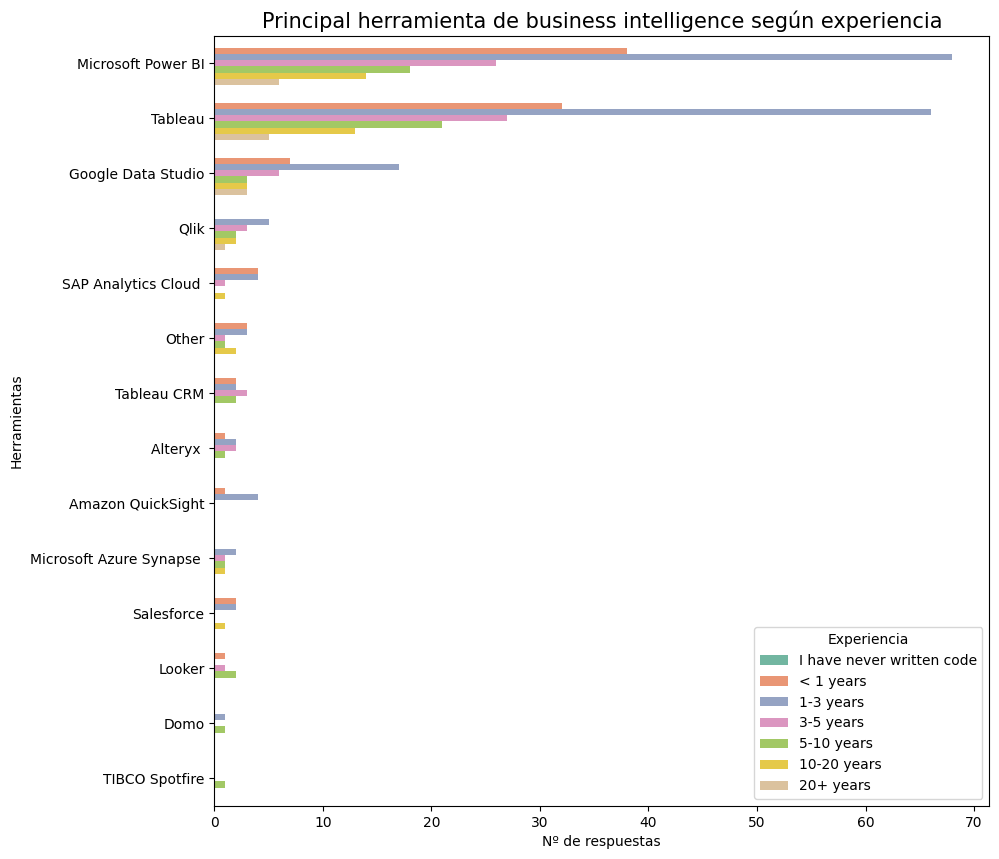

In [76]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y = 'q35', data = df, palette = 'Set2', hue='q6', order=df['q35'].value_counts().reset_index()['index'], hue_order=spv.orden_experiencia)

fig.set_title('Principal herramienta de business intelligence según experiencia', fontsize = 15)

fig.set(ylabel='Herramientas', xlabel='Nº de respuestas') 

plt.legend(title='Experiencia')

plt.show();

In [32]:
europa = df_q7[df_q7['continente'] == 'Europa']

In [33]:
df_eaa = df_q7[df_q7['continente'].isin(['Europa', 'América del Norte', 'Asia'])]


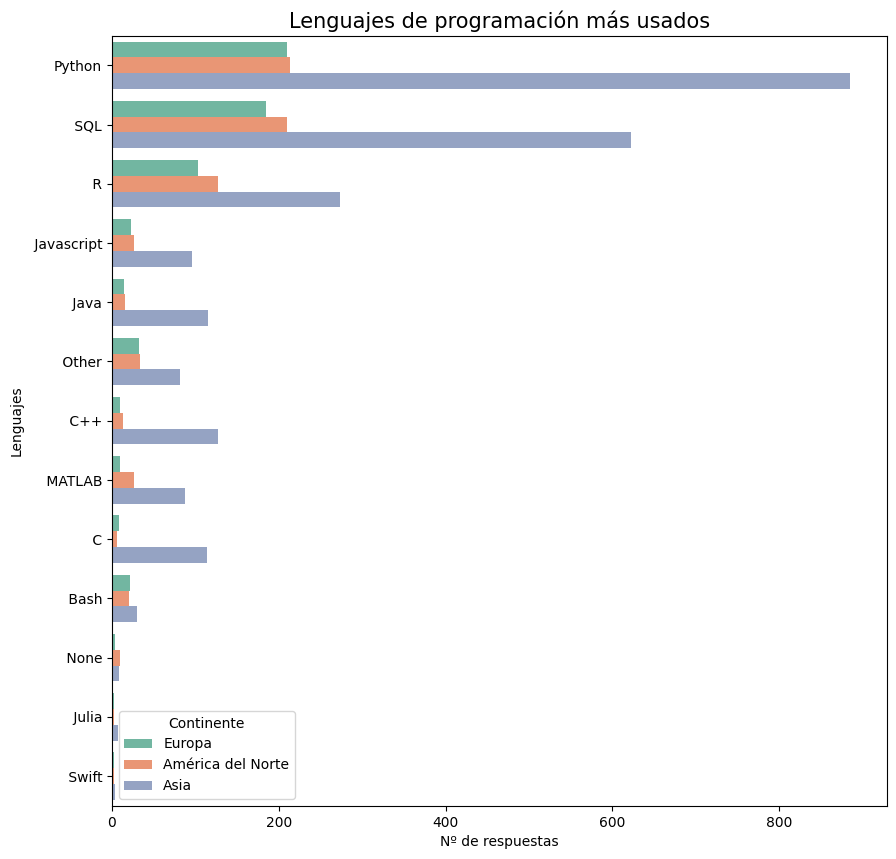

In [77]:
plt.figure(figsize = (10,10))

fig = sns.countplot(y='q7', hue = 'continente', data = df_eaa, palette = 'Set2', order=df_q7['q7'].value_counts().reset_index()['index'])

fig.set_title('Lenguajes de programación más usados', fontsize = 15)

fig.set(xlabel='Nº de respuestas', ylabel='Lenguajes') 

plt.legend(title='Continente')

plt.show();